## <div class="alert alert-block alert-info"><font color='#202EF9'>Table of contents<font><a class='anchor' id='top'></a></div>
- [1. Introduction](#1)
- [2. Import data and libraries](#2)
- [3. Initial Data Inspection](#3)
- [4. Data Cleaning and Preprocessing](#4)
    - [4.1. Initial Exploratory Data Analysis (EDA)](#4_1)
    - [4.2. Handling Missing Values](#4_2)
        - [4.2.1. Encode Categorical Data](#4_2_1)
        - [4.2.2. KNN Imputation](#4_2_2)
    - [4.3. Dealing with Outliers](#4_3)
- [5. Hyperparameter Optimization and Evaluation](#5)
- [6. Model Building](#6)

## **<div class="alert alert-block alert-info"> 1. Introduction <a class="anchor"  id="1"></a></div>**

* **Overview**

[Titanic Overview](https://www.kaggle.com/competitions/titanic/overview)

* **Dataset:** 

[Titanic Dataset](https://www.kaggle.com/competitions/titanic/data)

* **The Challenge**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


* **What Data Will I Use in This Competition?**

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled <code>train.csv</code> and the other is titled <code>test.csv</code>.

<code>Train.csv</code> will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The <code>test.csv</code> dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the <code>train.csv</code> data, predict whether the other 418 passengers on board (found in <code>test.csv</code>) survived.

## **<div class="alert alert-block alert-info"> 2. Import Data and Libraries <a class="anchor"  id="2"></a> </div>**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
from numpy import std, percentile, mean
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

import pickle

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Load Train Dataset
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
print(type(df_train))

# Load Test Dataset
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
print(type(df_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## **<div class="alert alert-block alert-info">3. Initial Data Inspection <a class="anchor"  id="3"></a></div>**
Basic commands to view the dataset structure, size, and a few samples.

In [3]:
# Display the first 5 rows of data

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display the Size of data

df_train_sh = df_train.shape
print(f'This train dataset contains {df_train_sh[0]} rows and {df_train_sh[1]} columns\n')

df_test_sh = df_test.shape
print(f'This train dataset contains {df_test_sh[0]} rows and {df_test_sh[1]} columns')

This train dataset contains 891 rows and 12 columns

This train dataset contains 418 rows and 11 columns


**The test_data has one column less than the train_data because the target column (<code>Survived</code>) is not present in it.**

In [5]:
# Check the data type of each column

print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## **<div class="alert alert-block alert-info">4. Data Cleaning and Preprocessing <a class="anchor"  id="4"></a></div>**

- [4.1. Initial Exploratory Data Analysis (EDA)](#4_1)
- [4.2. Handling Missing Values](#4_2)
    - [4.2.1. Data Imputation](#4_2_1)
- [4.3. Dealing with Outliers](#4_3)

## **<div class="alert alert-block alert-info">4.1. Initial Exploratory Data Analysis (EDA) <a class="anchor"  id="4_1"></a></div>**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.00,257.35,1.00,223.50,446.00,668.5,891.00
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


In [8]:
df_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


<Axes: >

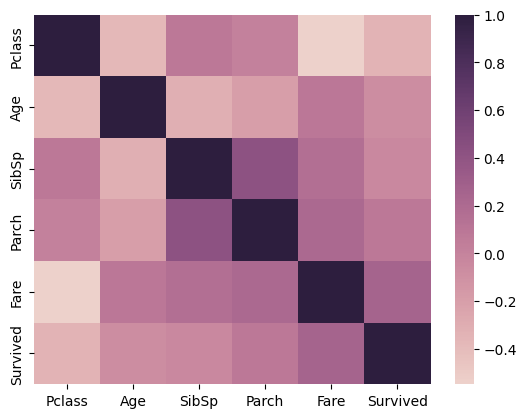

In [9]:
sns.heatmap(df_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr(),
            cmap=sns.cubehelix_palette(as_cmap=True))

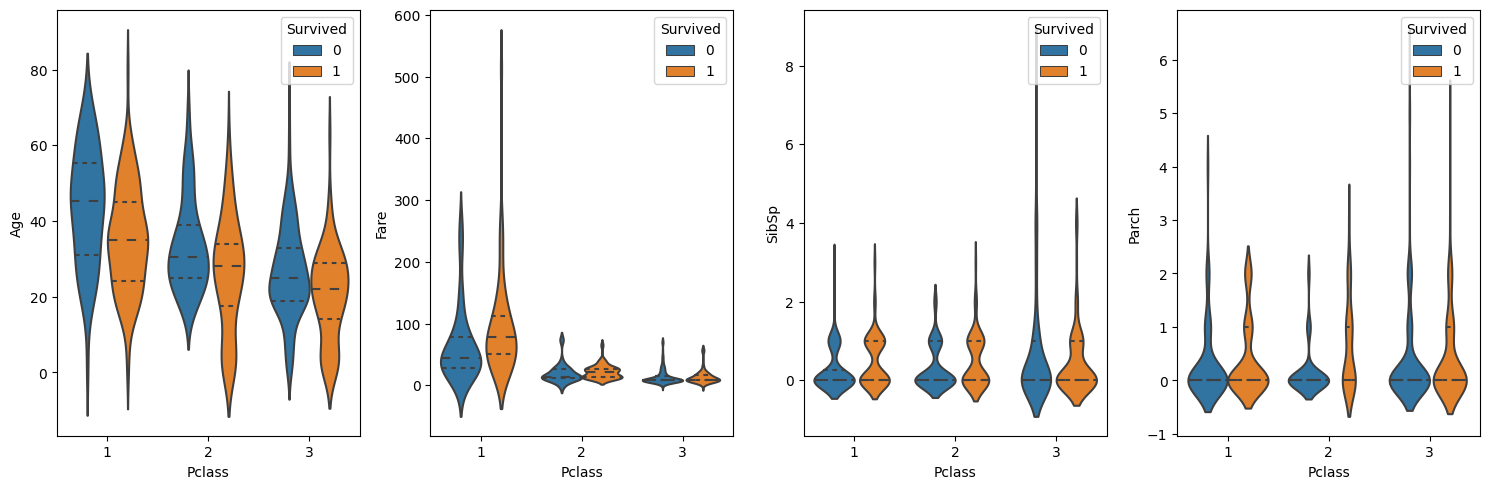

In [10]:
# Resize
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', inner='quart', ax=axs[0])
sns.violinplot(data=df_train, x='Pclass', y='Fare', hue='Survived', inner='quart', ax=axs[1])
sns.violinplot(data=df_train, x='Pclass', y='SibSp', hue='Survived', inner='quart', ax=axs[2])
sns.violinplot(data=df_train, x='Pclass', y='Parch', hue='Survived', inner='quart', ax=axs[3])

# Adjust the distance between charts
plt.tight_layout()
plt.show()

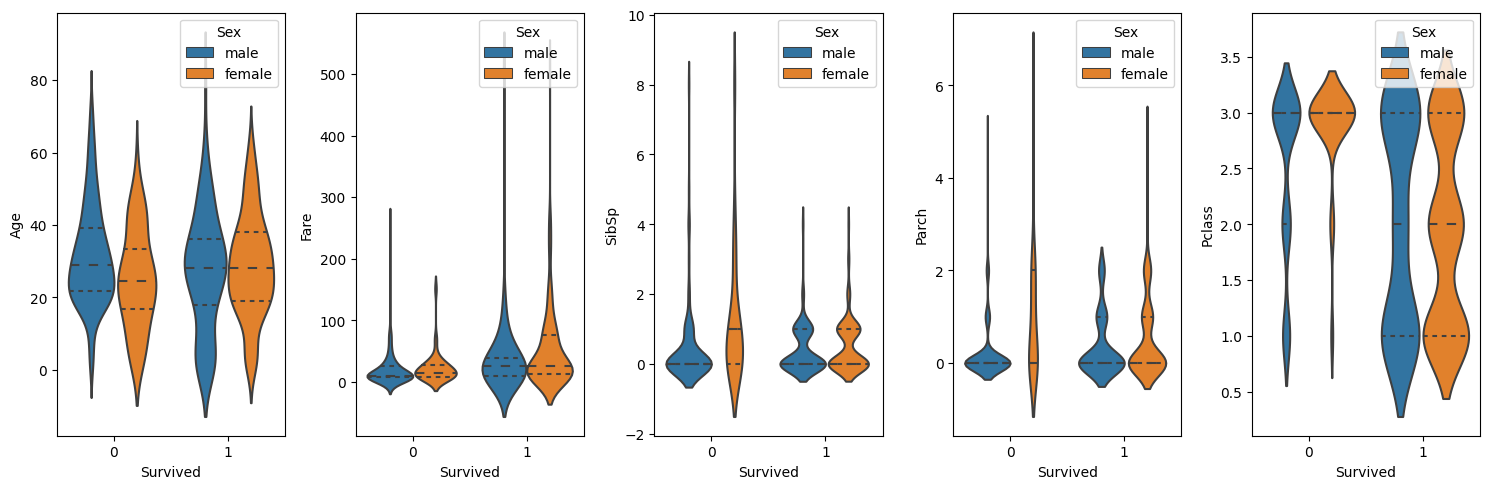

In [11]:
# Resize
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

sns.violinplot(data=df_train, x='Survived', y='Age', hue='Sex', inner='quart', ax=axs[0])
sns.violinplot(data=df_train, x='Survived', y='Fare', hue='Sex', inner='quart', ax=axs[1])
sns.violinplot(data=df_train, x='Survived', y='SibSp', hue='Sex', inner='quart', ax=axs[2])
sns.violinplot(data=df_train, x='Survived', y='Parch', hue='Sex', inner='quart', ax=axs[3])
sns.violinplot(data=df_train, x='Survived', y='Pclass', hue='Sex', inner='quart', ax=axs[4])

# Adjust the distance between charts
plt.tight_layout()
plt.show()

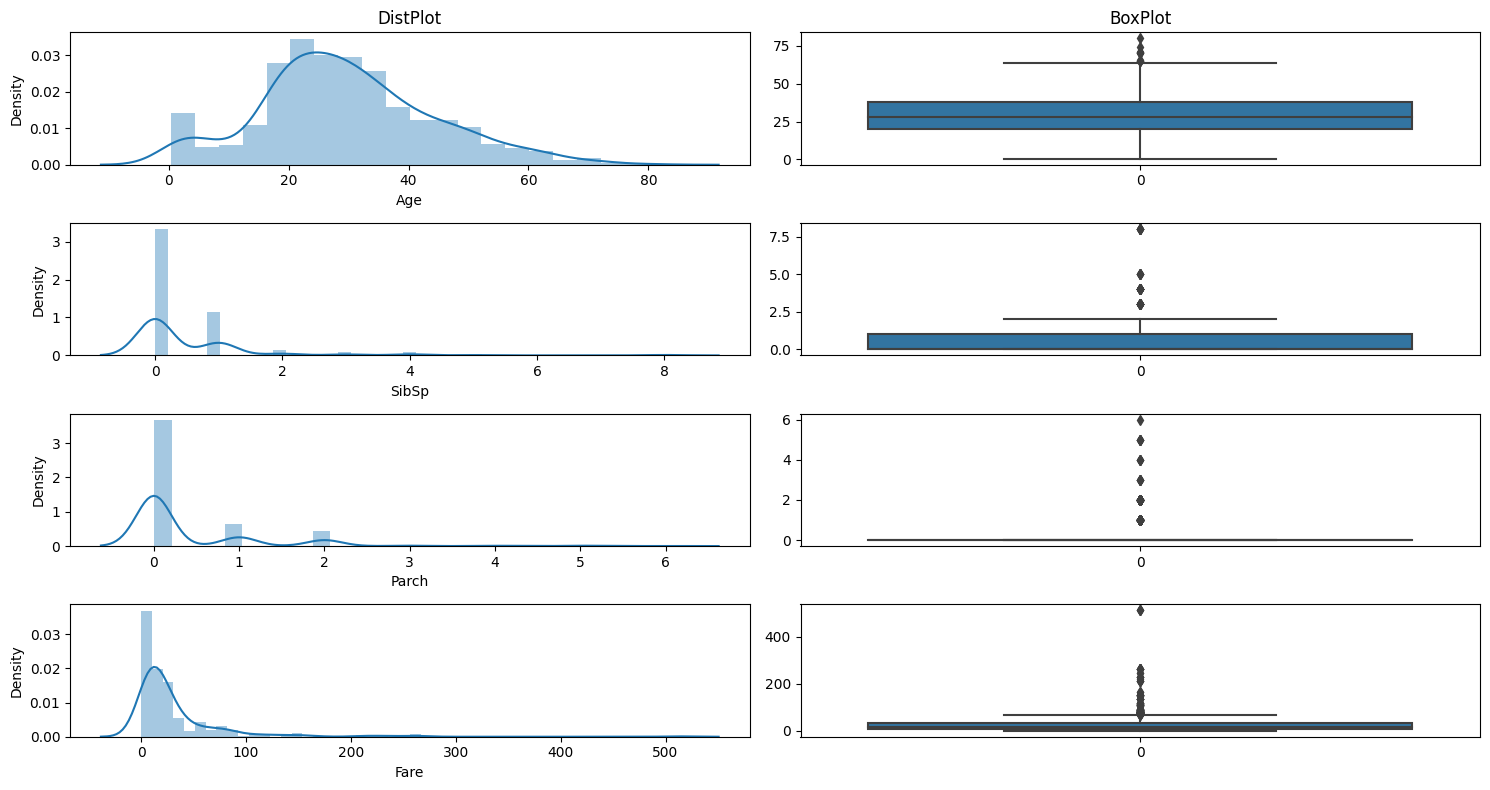

In [12]:
# Resize
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 8))

# Age
sns.distplot(df_train['Age'], ax=axs[0, 0])
axs[0, 0].set_title("DistPlot")
sns.boxplot(df_train['Age'], ax=axs[0, 1])
axs[0, 1].set_title("BoxPlot")

# SibSp
sns.distplot(df_train['SibSp'], ax=axs[1, 0])
axs[0, 0].set_title("DistPlot")
sns.boxplot(df_train['SibSp'], ax=axs[1, 1])
axs[0, 1].set_title("BoxPlot")

# Parch
sns.distplot(df_train['Parch'], ax=axs[2, 0])
axs[0, 0].set_title("DistPlot")
sns.boxplot(df_train['Parch'], ax=axs[2, 1])
axs[0, 1].set_title("BoxPlot")

# Fare
sns.distplot(df_train['Fare'], ax=axs[3, 0])
axs[0, 0].set_title("DistPlot")
sns.boxplot(df_train['Fare'], ax=axs[3, 1])
axs[0, 1].set_title("BoxPlot")

# Adjust the distance between charts
plt.tight_layout()
plt.show()

## **<div class="alert alert-block alert-info">4.2. Handling Missing Values <a class="anchor"  id="4_2"></a></div>**

In [13]:
# Selection of important variables for the model
df_train = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

# Handling missing values
df_train.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [14]:
df_train.isnull().mean()*100

Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
Survived     0.000000
dtype: float64

**About 20% (177) of the <code>Age</code> column, 77% (687) of the <code>Cabin</code> column and 0.22% (2) of the <code>Embarked</code> column are missing data.**

In [15]:
# Delete 2 rows of missing data in column Embarked

df_train.dropna(subset=['Embarked'], inplace=True)

**There are 177 missing data in the <code>Age</code> column, which is about <font color='red'>20%</font> of the total data
Removing the age column is a mistake; Deleting the missing 177 rows is also wrong.**

**So let's predict the missing data in the age column.**

**For this, I first consider the <code>Age</code> column as the target column and try to predict the missing values with the rest of the variables.**

**Let's get started!**

## **<div class="alert alert-block alert-info">4.2.1. Encode Categorical Data<a class="anchor"  id="4_2_1"></a></div>**

#### **Dummy variable encoding**

**The one hot encoding creates one binary variable for each category. The problem is that this
representation includes redundancy. For example, if we know that [1, 0, 0] represents <font color='blue'>blue</font> and
[0, 1, 0] represents <font color='green'>green</font> we don’t need another binary variable to represent <font color='red'>red</font>, instead we
could use 0 values alone, e.g. [0, 0]. This is called a dummy variable encoding, and always
represents C categories with C − 1 binary variables.**

**Reference**. Jason Brownlee, [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/), Page 245.

In [16]:
# Dummy variable encoding
df_train = pd.get_dummies(df_train, columns=['Embarked', ], drop_first=True)
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,7.2500,0,False,True
1,1,female,38.0,1,0,71.2833,1,False,False
2,3,female,26.0,0,0,7.9250,1,False,True
3,1,female,35.0,1,0,53.1000,1,False,True
4,3,male,35.0,0,0,8.0500,0,False,True


In [17]:
# Ordinal encode input variables
ordinal_e = OrdinalEncoder()
df_train[['Sex','Embarked_Q', 'Embarked_S']] = ordinal_e.fit_transform(df_train[['Sex','Embarked_Q', 'Embarked_S']])
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3,1.0,22.0,1,0,7.2500,0,0.0,1.0
1,1,0.0,38.0,1,0,71.2833,1,0.0,0.0
2,3,0.0,26.0,0,0,7.9250,1,0.0,1.0
3,1,0.0,35.0,1,0,53.1000,1,0.0,1.0
4,3,1.0,35.0,0,0,8.0500,0,0.0,1.0


## **<div class="alert alert-block alert-info">4.2.2. KNN Imputation<a class="anchor"  id="4_2_2"></a></div>**


**An effective approach to data imputating is use a model to predict the missing values.
A model is created for each feature that that missing values, taking as input values of perhaps all other input features.**

**One popular technique for imputation is a K-nearest neighbor model. A new sample is imputed by finding the samples in the training set "closest" to it and averages these nearby points to fill in the value.**

**If input variables are numeric, then regression models can be used for prediction, and this case is quite common. A range of different models can be used, although a simple k-nearest neighbor (KNN) model has proven to be effective in expriments. The use of a KNN model to predict or fill missing values is referred to as *Nearest Neighbor Imputation* or *KNN imputation*.**

**Reference**. Jason Brownlee, Data Preparation for ML, Page 87.

In [18]:
df_impu = df_train.copy()
df_impu.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3,1.0,22.0,1,0,7.2500,0,0.0,1.0
1,1,0.0,38.0,1,0,71.2833,1,0.0,0.0
2,3,0.0,26.0,0,0,7.9250,1,0.0,1.0
3,1,0.0,35.0,1,0,53.1000,1,0.0,1.0
4,3,1.0,35.0,0,0,8.0500,0,0.0,1.0


**Another critical point here is that the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. For simplicity, we will use Scikit-Learn’s <code>MinMaxScaler</code> which will scale our variables to have values between 0 and 1.**

In [19]:
df_impu.isnull().sum()

Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Survived        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [20]:
scaler = MinMaxScaler()
df_impu = pd.DataFrame(scaler.fit_transform(df_impu), columns = df_impu.columns)
df_impu.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0
1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0,0.0,1.0
3,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,1.0
4,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0


In [21]:
# Define imputer
imputer = KNNImputer(n_neighbors=5)

df_impu = pd.DataFrame(imputer.fit_transform(df_impu),columns = df_impu.columns)
df_impu.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0
1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0
2,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0,0.0,1.0


In [22]:
df_impu.isna().any()

Pclass        False
Sex           False
Age           False
SibSp         False
Parch         False
Fare          False
Survived      False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [23]:
df_impu_inv = scaler.inverse_transform(df_impu)

df_impu = pd.DataFrame(df_impu_inv, columns=df_impu.columns)
df_impu.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,1.0,0.0,1.0


## **<div class="alert alert-block alert-info">4.3. Dealing with Outliers<a class="anchor"  id="4_3"></a></div>**

<img src=https://www.simplypsychology.org/wp-content/uploads/boxplot-outliers.png width="600">

Not all data is normal or normal enough to treat it as being drawn from a Gaussion distribution. A good statistics for summarizing a non-Gaussian distribution sample of data is the Interquatile Range, or IQR for short. The is calculated as the difference between the 75th and the 25th percentile is the data and defines the box in a box and whisker plot.

**Reference**. Jason Brownlee, Data Preparation for ML, Page 58.

**[Image Source](https://www.simplypsychology.org/boxplots.html#:~:text=When%20reviewing%20a%20box%20plot,whiskers%20of%20the%20box%20plot.&text=For%20example%2C%20outside%201.5%20times,Q3%20%2B%201.5%20*%20IQR)**

In [24]:
df_train = df_impu.copy()
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,1.0,0.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,1.0,0.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0


<Axes: >

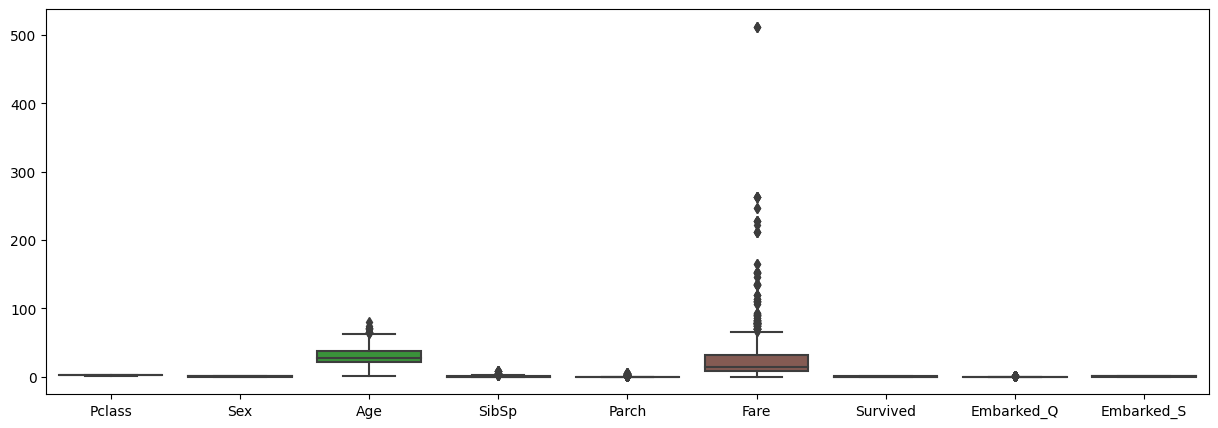

In [25]:
# Resize
plt.figure(figsize=(15, 5))

sns.boxplot(data=df_train)

In [26]:
list_out_indexes = list()

for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    # Calculate interquartile range
    q25, q75 = percentile(df_train[col], 25), percentile(df_train[col], 75)
    iqr = q75 - q25
    
    # Calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    out_df = df_train[(df_train[col]>upper) | (df_train[col]<lower)]
    list_out_indexes += list(out_df.index)
    print(f'The number of outliers in the <{col}> field: {len(out_df)}')
    
list_out_indexes_unique = list(set(list_out_indexes))
print(f'The number of unique outliers in the all columns: {len(list_out_indexes_unique)}')

The number of outliers in the <Age> field: 13
The number of outliers in the <Fare> field: 114
The number of outliers in the <SibSp> field: 46
The number of outliers in the <Parch> field: 213
The number of unique outliers in the all columns: 292


In [27]:
df_train.drop(list_out_indexes_unique, inplace=True)

# Reset DataFrame indexes 
df_train.reset_index(inplace=True, drop=True)
print("df_train.shape: {}".format(df_train.shape))
df_train.head()

df_train.shape: (597, 9)


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked_Q,Embarked_S
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,3.0,0.0,26.0,0.0,0.0,7.9250,1.0,0.0,1.0
2,1.0,0.0,35.0,1.0,0.0,53.1000,1.0,0.0,1.0
3,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0
4,3.0,1.0,47.8,0.0,0.0,8.4583,0.0,1.0,0.0


## **<div class="alert alert-block alert-info">5. Hyperparameter Optimization and Evaluation<a class="anchor"  id="5"></a></div>**

In [28]:
df_train['Survived'].value_counts()

Survived
0.0    419
1.0    178
Name: count, dtype: int64

In [29]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

print("Size of X training set: {}   size of y training set: {}".format(X_train.shape, y_train.shape))

Size of X training set: (597, 8)   size of y training set: (597,)


In [30]:
# import time
# start_time = time.time()

# # Number of trees in random forest
# n_estimators = [int(x) for x in range(2, 11)]

# # Number of features to consider at every split
# max_features = ['sqrt', 'log2', 'auto']

# # Maxsimum number of levels in tree
# max_depth = [3, 4, 5, 6, 7, 8, 9, 10, 11]

# # Minimum number of samples required to split a node
# min_samples_split = [5, 10, 20, 30, 40, 50, 100]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [5, 10, 20, 30, 40, 50, 100]

# # Method of selecting samples for training each tree
# bootstrap = [True]

# # Criterion
# criterion = ['gini', 'entropy']

# # Create the Random Grid
# param_grid = {'criterion' : criterion,
#               'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

# # Use the Grid Search to Search for Best Hyperparameters
# # First Create the Base Model to Tune
# forest = RandomForestClassifier(random_state=0)

# # KFold Cross-Validation
# kfold = KFold(n_splits=3, shuffle=True, random_state=0)
# grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=kfold, scoring='accuracy')

# # Fit the Grid Search Model
# grid_search.fit(X_train, y_train)

# # Summarize Results
# print('Best parameters: {}'.format(grid_search.best_params_))
# print('Best cross-validation score: {:.3f}'.format(grid_search.best_score_))
# print('Best estimator: {}'.format(grid_search.best_estimator_))

# results = pd.DataFrame(grid_search.cv_results_)
# # display(results.head())

# print("--- %s seconds ---" % (time.time() - start_time))

Output:

Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 4}

Best cross-validation score: 0.849

Best estimator: RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=4, random_state=0)
                       
--- 1195.9046943187714 seconds ---

## **<div class="alert alert-block alert-info">6. Model Building<a class="anchor"  id="6"></a></div>**

In [31]:
forest = RandomForestClassifier(n_estimators=4, criterion="gini", max_features="log2", max_depth=8,
                                min_samples_split=5 , min_samples_leaf=5 , bootstrap=True, random_state=0)

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=4, random_state=0)

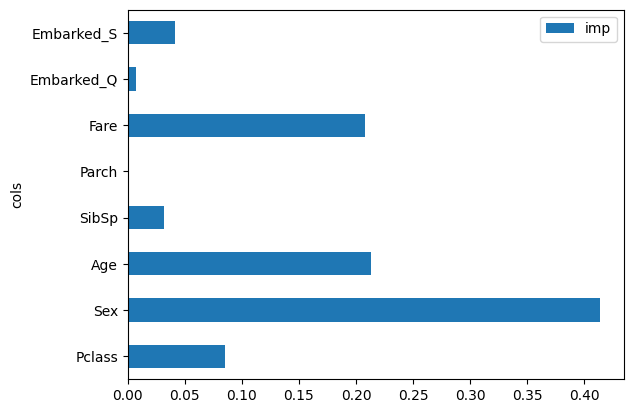

In [32]:
pd.DataFrame(dict(cols=X_train.columns, imp=forest.feature_importances_)).plot('cols', 'imp', 'barh');

In [33]:
# Save model
filename = 'titanic_forest.sav'
pickle.dump(forest, open(filename, 'wb'))

In [34]:
X_test = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Dummy variable encoding
X_test = pd.get_dummies(X_test, columns=['Embarked', ], drop_first=True)

# Ordinal encode input variables
ordinal_e = OrdinalEncoder()
X_test[['Sex','Embarked_Q', 'Embarked_S']] = ordinal_e.fit_transform(X_test[['Sex','Embarked_Q', 'Embarked_S']])

df_impu = X_test.copy()

scaler = MinMaxScaler()
df_impu = pd.DataFrame(scaler.fit_transform(df_impu), columns = df_impu.columns)

# Define imputer
imputer = KNNImputer(n_neighbors=5)
df_impu = pd.DataFrame(imputer.fit_transform(df_impu),columns = df_impu.columns)


df_impu_inv = scaler.inverse_transform(df_impu)
df_impu = pd.DataFrame(df_impu_inv, columns=df_impu.columns)

X_test = df_impu.copy()
print("Size of X test set: {}".format(X_test.shape))
X_test.head()

Size of X test set: (418, 8)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3.0,1.0,34.5,0.0,0.0,7.8292,1.0,0.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,1.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,1.0,0.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,1.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,0.0,1.0


In [35]:
X_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [36]:
y_pred_forest = forest.predict(X_test)
y_pred_forest

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [37]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
df_test['Survived'] = y_pred_forest
df_sub = df_test[['PassengerId', 'Survived']]
df_sub['Survived'] = df_sub['Survived'].astype(int)
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [39]:
df_sub.to_csv('sub-TitanicForest.csv', index=False)

<div class="alert alert-block alert-info"> 📌 I'm completing this notebook. I'm happy to know your opinious.</div>

**Ways of communication with me:**
**[Linkedin](https://www.linkedin.com/in/mohammad-erfan-tangestani/) | [Twitter](https://twitter.com/ThisIsErfann)**